In [1]:
import networkx as nx

G = nx.read_weighted_edgelist('../final_solution/male_graph.edgelist')

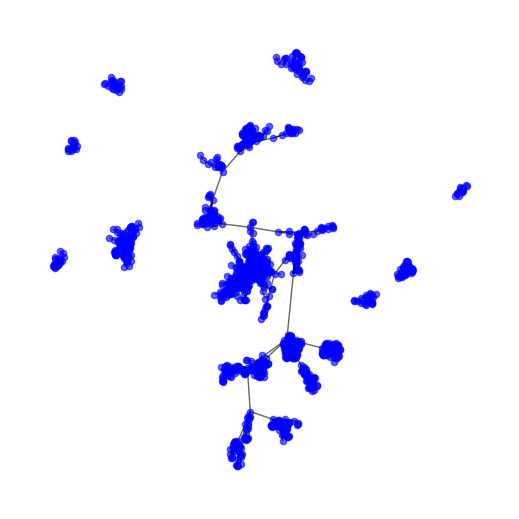

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Plot the graph using spring_layout
plt.figure(figsize=(5, 5))  # Larger plot size to avoid clutter
pos = nx.spring_layout(G, iterations=100)

# Draw the graph with larger edges and higher transparency
nx.draw(G, pos, node_size=20, width=1, with_labels=False, node_color='blue', edge_color='black', alpha=0.6)

# Display the plot
plt.show()

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_eda(G: nx.Graph):
    """
    Perform Exploratory Data Analysis (EDA) on the given NetworkX graph.
    This function computes and displays basic graph metrics and visualizes some
    key properties of the graph.
    """

    # Basic graph properties
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
    density = nx.density(G)
    is_connected = nx.is_connected(G)
    
    # Compute centrality measures
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)

    # Collecting metrics in a dictionary
    graph_metrics = {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'avg_degree': avg_degree,
        'density': density,
        'is_connected': is_connected,
        'degree_centrality': degree_centrality,
        'closeness_centrality': closeness_centrality,
        'betweenness_centrality': betweenness_centrality,
    }

    return graph_metrics

def plot_degree_distribution(G: nx.Graph):
    """
    Plots the degree distribution of the graph as a line plot, where the degree is on the y-axis.
    
    Args:
        G (nx.Graph): The NetworkX graph object.
    """
    # Get the degrees of all nodes in the graph
    degree_sequence = [d for n, d in G.degree()]
    
    # Count the frequency of each degree value
    degree_count = {}
    for degree in degree_sequence:
        degree_count[degree] = degree_count.get(degree, 0) + 1
    
    # Sort degrees and frequencies
    degrees = sorted(degree_count.keys())
    counts = [degree_count[degree] for degree in degrees]

    # Plotting the degree distribution as a line plot
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, counts, marker='.', linestyle='-', color='white', alpha=1)

    # Add red vertical line at x = 0
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    # Add red horizontal line at y = 0
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)

    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Nodes")
    plt.show()

In [4]:
graph_metrics = graph_eda(G)

In [5]:
print(f"Graph has {graph_metrics["num_nodes"]} nodes and {graph_metrics["num_edges"]} edges.")
print(f"Average degree: {graph_metrics["avg_degree"]:.2f}")
print(f"Graph density: {graph_metrics["density"]:.4f}")
print(f"Is the graph connected? {'Yes' if graph_metrics["is_connected"] else 'No'}")

Graph has 1690 nodes and 15423 edges.
Average degree: 18.25
Graph density: 0.0108
Is the graph connected? No


In [6]:
# Print centrality measures for top 5 nodes
print("\nTop 5 nodes by degree centrality:")
top_5_degree = sorted(graph_metrics["degree_centrality"].items(), key=lambda x: x[1], reverse=True)[:5]
for node, centrality in top_5_degree:
    print(f"Node {node}: Degree Centrality = {centrality:.4f}")

print("\nTop 5 nodes by closeness centrality:")
top_5_closeness = sorted(graph_metrics["closeness_centrality"].items(), key=lambda x: x[1], reverse=True)[:5]
for node, centrality in top_5_closeness:
    print(f"Node {node}: Closeness Centrality = {centrality:.4f}")

print("\nTop 5 nodes by betweenness centrality:")
top_5_betweenness = sorted(graph_metrics["betweenness_centrality"].items(), key=lambda x: x[1], reverse=True)[:5]
for node, centrality in top_5_betweenness:
    print(f"Node {node}: Betweenness Centrality = {centrality:.4f}")


Top 5 nodes by degree centrality:
Node 15002: Degree Centrality = 0.1593
Node 24795: Degree Centrality = 0.1528
Node 39652: Degree Centrality = 0.1456
Node 7656: Degree Centrality = 0.1439
Node 27536: Degree Centrality = 0.1403

Top 5 nodes by closeness centrality:
Node 15002: Closeness Centrality = 0.1814
Node 27536: Closeness Centrality = 0.1806
Node 20794: Closeness Centrality = 0.1804
Node 24795: Closeness Centrality = 0.1788
Node 7691: Closeness Centrality = 0.1787

Top 5 nodes by betweenness centrality:
Node 15840: Betweenness Centrality = 0.0771
Node 17401: Betweenness Centrality = 0.0482
Node 18354: Betweenness Centrality = 0.0379
Node 28751: Betweenness Centrality = 0.0286
Node 15657: Betweenness Centrality = 0.0197


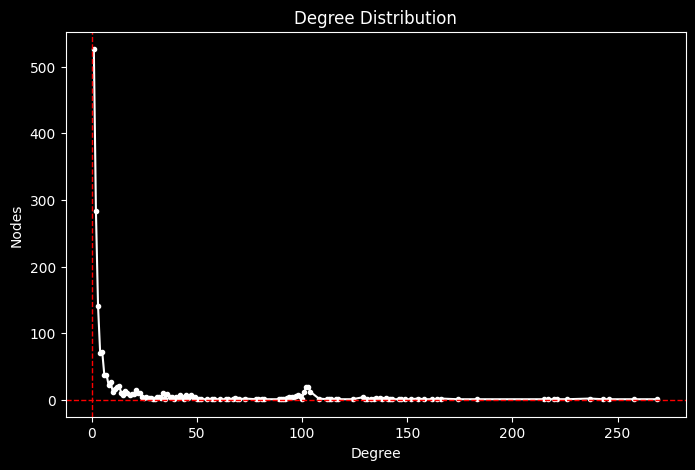

In [7]:
plot_degree_distribution(G)